<a href="https://colab.research.google.com/github/Bisheshsingh/AI-ML/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# IMPORTING DATA

In [ ]:
df=pd.read_csv("cle2.csv")
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


# ANALYZING DATA

In [ ]:
def var(x):
    return int(x>0)
df['target']=df['target'].apply(var)

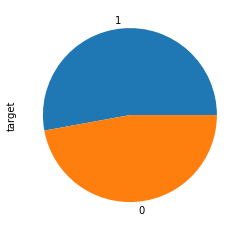

In [ ]:
df['target'].value_counts().plot(kind='pie')

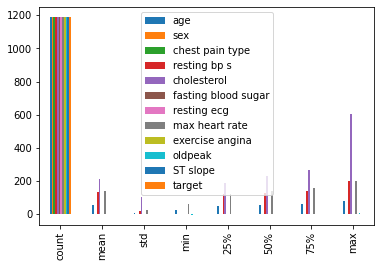

In [ ]:
df.describe().plot(kind='bar')

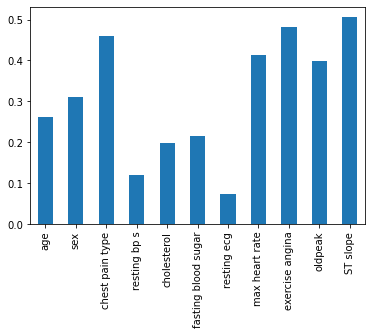

In [ ]:
df.corr()['target'][:-1].apply(abs).plot(kind='bar')

# MACHINE LEARNING

In [ ]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import preprocessing

def con(x):
    return preprocessing.MinMaxScaler().fit_transform(x)

In [ ]:
data=df.iloc[:,0:11]
target=df.iloc[:,11]

In [ ]:
data=con(data)
len(data)

1190

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(data,target,test_size=0.3, random_state=1)
len(test_x)

357

In [ ]:
model1=LogisticRegression()
model1.fit(train_x,train_y)
ml1=model1.predict(test_x)
ac1=accuracy_score(ml1,test_y)*100
ac1

85.99439775910365

In [ ]:
model2=DecisionTreeClassifier()
model2.fit(train_x,train_y)
ml2=model2.predict(test_x)
ac2=accuracy_score(ml2,test_y)*100
ac2

88.51540616246498

In [ ]:
model3=RandomForestClassifier(n_estimators=80)
model3.fit(train_x,train_y)
ml3=model3.predict(test_x)
ac3=accuracy_score(ml3,test_y)*100
ac3

93.27731092436974

In [ ]:
model4=SVC()
model4.fit(train_x,train_y)
ml4=model4.predict(test_x)
ac4=accuracy_score(ml4,test_y)*100
ac4

89.35574229691878

In [ ]:
model5=KNeighborsClassifier()
model5.fit(train_x,train_y)
ml5=model5.predict(test_x)
ac5=accuracy_score(ml5,test_y)*100
ac5

86.83473389355743

# DEEP LEARNING

In [ ]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [ ]:
model = Sequential()
model.add(Dense(24, input_dim=11, activation='tanh'))
model.add(Dense(36, activation='tanh'))
model.add(Dense(24, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(12, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_x,train_y,epochs=5000,batch_size=10,verbose=1)

Epoch 1/5000
84/84 [==============================] - 1s 2ms/step - loss: 0.6761 - accuracy: 0.5954
Epoch 2/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.5873 - accuracy: 0.6999
Epoch 3/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.5261 - accuracy: 0.7599
Epoch 4/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.4893 - accuracy: 0.7791
Epoch 5/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.7971
Epoch 6/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.4735 - accuracy: 0.8103
Epoch 7/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.4715 - accuracy: 0.8007
Epoch 8/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.4822 - accuracy: 0.8103
Epoch 9/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.4531 - accuracy: 0.8115
Epoch 10/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.4588 - accuracy: 0.7995

84/84 [==============================] - 0s 2ms/step - loss: 0.4117 - accuracy: 0.8283
Epoch 163/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8139
Epoch 164/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.4041 - accuracy: 0.8499
Epoch 165/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8331
Epoch 166/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8211
Epoch 167/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.8331
Epoch 168/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.4126 - accuracy: 0.8379
Epoch 169/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.4137 - accuracy: 0.8343
Epoch 170/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.8283
Epoch 171/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.

84/84 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8511
Epoch 323/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3815 - accuracy: 0.8475
Epoch 324/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3786 - accuracy: 0.8475
Epoch 325/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.8379
Epoch 326/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3919 - accuracy: 0.8343
Epoch 327/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3724 - accuracy: 0.8403
Epoch 328/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3894 - accuracy: 0.8439
Epoch 329/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3800 - accuracy: 0.8379
Epoch 330/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3803 - accuracy: 0.8511
Epoch 331/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3950 - accuracy: 0.

84/84 [==============================] - 0s 2ms/step - loss: 0.3897 - accuracy: 0.8427
Epoch 483/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3603 - accuracy: 0.8691
Epoch 484/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3669 - accuracy: 0.8487
Epoch 485/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3705 - accuracy: 0.8583
Epoch 486/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3863 - accuracy: 0.8391
Epoch 487/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3583 - accuracy: 0.8583
Epoch 488/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3594 - accuracy: 0.8752
Epoch 489/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3825 - accuracy: 0.8439
Epoch 490/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3642 - accuracy: 0.8607
Epoch 491/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3773 - accuracy: 0.

84/84 [==============================] - 0s 2ms/step - loss: 0.3525 - accuracy: 0.8739
Epoch 642/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3508 - accuracy: 0.8583
Epoch 643/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3422 - accuracy: 0.8715
Epoch 644/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.8836
Epoch 645/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3477 - accuracy: 0.8643
Epoch 646/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3628 - accuracy: 0.8703
Epoch 647/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3778 - accuracy: 0.8475
Epoch 648/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3618 - accuracy: 0.8607
Epoch 649/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3512 - accuracy: 0.8535
Epoch 650/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3575 - accuracy: 0.

84/84 [==============================] - 0s 2ms/step - loss: 0.3409 - accuracy: 0.8655
Epoch 801/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3343 - accuracy: 0.8752
Epoch 802/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3319 - accuracy: 0.8752
Epoch 803/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3300 - accuracy: 0.8836
Epoch 804/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3385 - accuracy: 0.8764
Epoch 805/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3625 - accuracy: 0.8764
Epoch 806/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3411 - accuracy: 0.8848
Epoch 807/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3236 - accuracy: 0.8836
Epoch 808/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3097 - accuracy: 0.8824
Epoch 809/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3307 - accuracy: 0.

84/84 [==============================] - 0s 3ms/step - loss: 0.3113 - accuracy: 0.8884
Epoch 961/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3180 - accuracy: 0.8896
Epoch 962/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3153 - accuracy: 0.8764
Epoch 963/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3180 - accuracy: 0.8788
Epoch 964/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3067 - accuracy: 0.8944
Epoch 965/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3129 - accuracy: 0.8860
Epoch 966/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3226 - accuracy: 0.8812
Epoch 967/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3136 - accuracy: 0.8884
Epoch 968/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3286 - accuracy: 0.8727
Epoch 969/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3594 - accuracy: 0.

84/84 [==============================] - 0s 2ms/step - loss: 0.3174 - accuracy: 0.8932
Epoch 1041/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3026 - accuracy: 0.8920
Epoch 1042/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3278 - accuracy: 0.8679
Epoch 1043/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3034 - accuracy: 0.9004
Epoch 1044/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3316 - accuracy: 0.8800
Epoch 1045/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3255 - accuracy: 0.8679
Epoch 1046/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.8860
Epoch 1047/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3167 - accuracy: 0.8896
Epoch 1048/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3222 - accuracy: 0.8836
Epoch 1049/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3167 - acc

84/84 [==============================] - 0s 2ms/step - loss: 0.3193 - accuracy: 0.8848
Epoch 1199/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3155 - accuracy: 0.8788
Epoch 1200/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3039 - accuracy: 0.8896
Epoch 1201/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3089 - accuracy: 0.8908
Epoch 1202/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3197 - accuracy: 0.8884
Epoch 1203/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3210 - accuracy: 0.8872
Epoch 1204/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3534 - accuracy: 0.8788
Epoch 1205/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3512 - accuracy: 0.8752
Epoch 1206/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3254 - accuracy: 0.8872
Epoch 1207/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3049 - acc

84/84 [==============================] - 0s 2ms/step - loss: 0.2838 - accuracy: 0.9004
Epoch 1357/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3081 - accuracy: 0.9028
Epoch 1358/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2966 - accuracy: 0.9064
Epoch 1359/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3129 - accuracy: 0.8944
Epoch 1360/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3107 - accuracy: 0.8968
Epoch 1361/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3082 - accuracy: 0.8944
Epoch 1362/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3176 - accuracy: 0.8944
Epoch 1363/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3051 - accuracy: 0.8872
Epoch 1364/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3044 - accuracy: 0.8932
Epoch 1365/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3096 - acc

Epoch 1435/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3142 - accuracy: 0.8920
Epoch 1436/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2859 - accuracy: 0.9100
Epoch 1437/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2773 - accuracy: 0.9100
Epoch 1438/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2847 - accuracy: 0.9064
Epoch 1439/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3202 - accuracy: 0.8896
Epoch 1440/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3504 - accuracy: 0.8643
Epoch 1441/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2986 - accuracy: 0.8908
Epoch 1442/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3112 - accuracy: 0.8908
Epoch 1443/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2917 - accuracy: 0.9088
Epoch 1444/5000
84/84 [==============================] - 0s 2ms/step - lo

84/84 [==============================] - 0s 2ms/step - loss: 0.2781 - accuracy: 0.9112
Epoch 1594/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2940 - accuracy: 0.9028
Epoch 1595/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2870 - accuracy: 0.9076
Epoch 1596/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2936 - accuracy: 0.8992
Epoch 1597/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2939 - accuracy: 0.9016
Epoch 1598/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2798 - accuracy: 0.9016
Epoch 1599/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2798 - accuracy: 0.8992
Epoch 1600/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2913 - accuracy: 0.9016
Epoch 1601/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3206 - accuracy: 0.8980
Epoch 1602/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3133 - acc

84/84 [==============================] - 0s 2ms/step - loss: 0.3008 - accuracy: 0.8920
Epoch 1752/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2780 - accuracy: 0.9040
Epoch 1753/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3622 - accuracy: 0.8752
Epoch 1754/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2803 - accuracy: 0.9184
Epoch 1755/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2727 - accuracy: 0.9100
Epoch 1756/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2780 - accuracy: 0.9076
Epoch 1757/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2741 - accuracy: 0.9088
Epoch 1758/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2809 - accuracy: 0.9160
Epoch 1759/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2762 - accuracy: 0.9112
Epoch 1760/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2874 - acc

84/84 [==============================] - 0s 2ms/step - loss: 0.2697 - accuracy: 0.9076
Epoch 1910/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2722 - accuracy: 0.9160
Epoch 1911/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3103 - accuracy: 0.8884
Epoch 1912/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3095 - accuracy: 0.8944
Epoch 1913/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3225 - accuracy: 0.8824
Epoch 1914/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2968 - accuracy: 0.9004
Epoch 1915/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2702 - accuracy: 0.9124
Epoch 1916/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2804 - accuracy: 0.9040
Epoch 1917/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2825 - accuracy: 0.9136
Epoch 1918/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2854 - acc

84/84 [==============================] - 0s 2ms/step - loss: 0.2730 - accuracy: 0.9208
Epoch 2068/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2794 - accuracy: 0.9100
Epoch 2069/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2800 - accuracy: 0.9160
Epoch 2070/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2765 - accuracy: 0.9184
Epoch 2071/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2724 - accuracy: 0.9232
Epoch 2072/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2680 - accuracy: 0.9124
Epoch 2073/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2766 - accuracy: 0.9148
Epoch 2074/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2837 - accuracy: 0.9208
Epoch 2075/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2737 - accuracy: 0.9208
Epoch 2076/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2761 - acc

84/84 [==============================] - 0s 2ms/step - loss: 0.2957 - accuracy: 0.9028
Epoch 2226/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2825 - accuracy: 0.9196
Epoch 2227/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2916 - accuracy: 0.9088
Epoch 2228/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2847 - accuracy: 0.9100
Epoch 2229/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2794 - accuracy: 0.9136
Epoch 2230/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2731 - accuracy: 0.9172
Epoch 2231/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2822 - accuracy: 0.9112
Epoch 2232/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2795 - accuracy: 0.9100
Epoch 2233/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2789 - accuracy: 0.9100
Epoch 2234/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2689 - acc

84/84 [==============================] - 0s 2ms/step - loss: 0.2778 - accuracy: 0.9052
Epoch 2384/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2712 - accuracy: 0.9160
Epoch 2385/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2779 - accuracy: 0.9160
Epoch 2386/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2789 - accuracy: 0.9124
Epoch 2387/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2877 - accuracy: 0.9112
Epoch 2388/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2727 - accuracy: 0.9136
Epoch 2389/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2817 - accuracy: 0.9136
Epoch 2390/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2852 - accuracy: 0.9112
Epoch 2391/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2788 - accuracy: 0.9112
Epoch 2392/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2985 - acc

84/84 [==============================] - 0s 2ms/step - loss: 0.2937 - accuracy: 0.9076
Epoch 2542/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2752 - accuracy: 0.9148
Epoch 2543/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2954 - accuracy: 0.9088
Epoch 2544/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3051 - accuracy: 0.8968
Epoch 2545/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2641 - accuracy: 0.9136
Epoch 2546/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2830 - accuracy: 0.9124
Epoch 2547/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2818 - accuracy: 0.9100
Epoch 2548/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2909 - accuracy: 0.9016
Epoch 2549/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2835 - accuracy: 0.9052
Epoch 2550/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2706 - acc

84/84 [==============================] - 0s 2ms/step - loss: 0.2668 - accuracy: 0.9088
Epoch 2700/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2727 - accuracy: 0.9100
Epoch 2701/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2696 - accuracy: 0.9148
Epoch 2702/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2742 - accuracy: 0.9100
Epoch 2703/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2734 - accuracy: 0.9112
Epoch 2704/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2628 - accuracy: 0.9184
Epoch 2705/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2764 - accuracy: 0.9160
Epoch 2706/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2715 - accuracy: 0.9136
Epoch 2707/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2569 - accuracy: 0.9196
Epoch 2708/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2638 - acc

84/84 [==============================] - 0s 2ms/step - loss: 0.2846 - accuracy: 0.9064
Epoch 2858/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2760 - accuracy: 0.9172
Epoch 2859/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2590 - accuracy: 0.9208
Epoch 2860/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2626 - accuracy: 0.9184
Epoch 2861/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2514 - accuracy: 0.9220
Epoch 2862/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2772 - accuracy: 0.9172
Epoch 2863/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2726 - accuracy: 0.9148
Epoch 2864/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2707 - accuracy: 0.9184
Epoch 2865/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2681 - accuracy: 0.9172
Epoch 2866/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2621 - acc

84/84 [==============================] - 0s 2ms/step - loss: 0.2531 - accuracy: 0.9100
Epoch 3016/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2719 - accuracy: 0.9076
Epoch 3017/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2591 - accuracy: 0.9148
Epoch 3018/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2553 - accuracy: 0.9160
Epoch 3019/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2674 - accuracy: 0.9148
Epoch 3020/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2664 - accuracy: 0.9196
Epoch 3021/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2551 - accuracy: 0.9184
Epoch 3022/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2662 - accuracy: 0.9196
Epoch 3023/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2424 - accuracy: 0.9220
Epoch 3024/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2491 - acc

84/84 [==============================] - 0s 2ms/step - loss: 0.2423 - accuracy: 0.9280
Epoch 3174/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2552 - accuracy: 0.9280
Epoch 3175/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2629 - accuracy: 0.9244
Epoch 3176/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2532 - accuracy: 0.9268
Epoch 3177/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2547 - accuracy: 0.9280
Epoch 3178/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2441 - accuracy: 0.9244
Epoch 3179/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2808 - accuracy: 0.9208
Epoch 3180/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2564 - accuracy: 0.9304
Epoch 3181/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2658 - accuracy: 0.9208
Epoch 3182/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2619 - acc

84/84 [==============================] - 0s 2ms/step - loss: 0.2435 - accuracy: 0.9364
Epoch 3332/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2365 - accuracy: 0.9388
Epoch 3333/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2432 - accuracy: 0.9376
Epoch 3334/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2459 - accuracy: 0.9388
Epoch 3335/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2371 - accuracy: 0.9376
Epoch 3336/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2403 - accuracy: 0.9364
Epoch 3337/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8800
Epoch 3338/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3113 - accuracy: 0.9076
Epoch 3339/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2673 - accuracy: 0.9292
Epoch 3340/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2331 - acc

84/84 [==============================] - 0s 2ms/step - loss: 0.2238 - accuracy: 0.9412
Epoch 3411/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2545 - accuracy: 0.9388
Epoch 3412/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2432 - accuracy: 0.9388
Epoch 3413/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2206 - accuracy: 0.9376
Epoch 3414/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2312 - accuracy: 0.9376
Epoch 3415/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2494 - accuracy: 0.9376
Epoch 3416/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2531 - accuracy: 0.9316
Epoch 3417/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2346 - accuracy: 0.9292
Epoch 3418/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2252 - accuracy: 0.9412
Epoch 3419/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2417 - acc

84/84 [==============================] - 0s 2ms/step - loss: 0.2387 - accuracy: 0.9352
Epoch 3569/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2587 - accuracy: 0.9328
Epoch 3570/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2560 - accuracy: 0.9304
Epoch 3571/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2599 - accuracy: 0.9316
Epoch 3572/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2479 - accuracy: 0.9352
Epoch 3573/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2490 - accuracy: 0.9364
Epoch 3574/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2420 - accuracy: 0.9376
Epoch 3575/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2300 - accuracy: 0.9400
Epoch 3576/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2254 - accuracy: 0.9424
Epoch 3577/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2232 - acc

84/84 [==============================] - 0s 2ms/step - loss: 0.2618 - accuracy: 0.9352
Epoch 3727/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2503 - accuracy: 0.9352
Epoch 3728/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2345 - accuracy: 0.9400
Epoch 3729/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2406 - accuracy: 0.9436
Epoch 3730/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2325 - accuracy: 0.9424
Epoch 3731/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2130 - accuracy: 0.9496
Epoch 3732/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2288 - accuracy: 0.9484
Epoch 3733/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2189 - accuracy: 0.9472
Epoch 3734/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2100 - accuracy: 0.9448
Epoch 3735/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2242 - acc

84/84 [==============================] - 0s 2ms/step - loss: 0.2077 - accuracy: 0.9508
Epoch 3885/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1977 - accuracy: 0.9556
Epoch 3886/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2272 - accuracy: 0.9376
Epoch 3887/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2342 - accuracy: 0.9448
Epoch 3888/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2195 - accuracy: 0.9460
Epoch 3889/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2249 - accuracy: 0.9472
Epoch 3890/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2104 - accuracy: 0.9484
Epoch 3891/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.3155 - accuracy: 0.9112
Epoch 3892/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2623 - accuracy: 0.9304
Epoch 3893/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2390 - acc

84/84 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9556
Epoch 4043/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1991 - accuracy: 0.9544
Epoch 4044/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1947 - accuracy: 0.9592
Epoch 4045/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.9556
Epoch 4046/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9544
Epoch 4047/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1994 - accuracy: 0.9532
Epoch 4048/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2044 - accuracy: 0.9508
Epoch 4049/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2056 - accuracy: 0.9496
Epoch 4050/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2263 - accuracy: 0.9460
Epoch 4051/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2170 - acc

84/84 [==============================] - 0s 2ms/step - loss: 0.1985 - accuracy: 0.9544
Epoch 4201/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1934 - accuracy: 0.9532
Epoch 4202/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2031 - accuracy: 0.9520
Epoch 4203/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1818 - accuracy: 0.9616
Epoch 4204/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 0.9544
Epoch 4205/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.9520
Epoch 4206/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1988 - accuracy: 0.9568
Epoch 4207/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2385 - accuracy: 0.9400
Epoch 4208/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1980 - accuracy: 0.9556
Epoch 4209/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1915 - acc

84/84 [==============================] - 0s 2ms/step - loss: 0.1855 - accuracy: 0.9580
Epoch 4359/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1869 - accuracy: 0.9556
Epoch 4360/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2155 - accuracy: 0.9508
Epoch 4361/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1787 - accuracy: 0.9592
Epoch 4362/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1912 - accuracy: 0.9568
Epoch 4363/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1782 - accuracy: 0.9568
Epoch 4364/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1898 - accuracy: 0.9544
Epoch 4365/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1853 - accuracy: 0.9568
Epoch 4366/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1847 - accuracy: 0.9592
Epoch 4367/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1950 - acc

84/84 [==============================] - 0s 2ms/step - loss: 0.1891 - accuracy: 0.9556
Epoch 4517/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1731 - accuracy: 0.9616
Epoch 4518/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1949 - accuracy: 0.9580
Epoch 4519/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1955 - accuracy: 0.9544
Epoch 4520/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1976 - accuracy: 0.9544
Epoch 4521/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1829 - accuracy: 0.9592
Epoch 4522/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1703 - accuracy: 0.9592
Epoch 4523/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1782 - accuracy: 0.9628
Epoch 4524/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1668 - accuracy: 0.9640
Epoch 4525/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1786 - acc

84/84 [==============================] - 0s 2ms/step - loss: 0.1758 - accuracy: 0.9640
Epoch 4675/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1809 - accuracy: 0.9616
Epoch 4676/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1639 - accuracy: 0.9628
Epoch 4677/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1877 - accuracy: 0.9568
Epoch 4678/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1754 - accuracy: 0.9616
Epoch 4679/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1832 - accuracy: 0.9616
Epoch 4680/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1803 - accuracy: 0.9604
Epoch 4681/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1679 - accuracy: 0.9640
Epoch 4682/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1654 - accuracy: 0.9628
Epoch 4683/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1885 - acc

84/84 [==============================] - 0s 2ms/step - loss: 0.1625 - accuracy: 0.9652
Epoch 4833/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1617 - accuracy: 0.9664
Epoch 4834/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1745 - accuracy: 0.9640
Epoch 4835/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1622 - accuracy: 0.9628
Epoch 4836/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1779 - accuracy: 0.9604
Epoch 4837/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1926 - accuracy: 0.9592
Epoch 4838/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1719 - accuracy: 0.9628
Epoch 4839/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2156 - accuracy: 0.9460
Epoch 4840/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2375 - accuracy: 0.9436
Epoch 4841/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2148 - acc

84/84 [==============================] - 0s 2ms/step - loss: 0.1911 - accuracy: 0.9580
Epoch 4991/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1873 - accuracy: 0.9556
Epoch 4992/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9664
Epoch 4993/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1668 - accuracy: 0.9652
Epoch 4994/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1687 - accuracy: 0.9652
Epoch 4995/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1651 - accuracy: 0.9676
Epoch 4996/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1850 - accuracy: 0.9556
Epoch 4997/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1641 - accuracy: 0.9652
Epoch 4998/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.1848 - accuracy: 0.9568
Epoch 4999/5000
84/84 [==============================] - 0s 2ms/step - loss: 0.2004 - acc

In [ ]:
def boolcon(x,j):
    for i in range(len(x)):
        x[i]=1 if x[i]>j else 0
    return x

nn=model.predict(data)
mx=-1
for i in range(50,99):
    if mx<accuracy_score(boolcon(nn,i/100),target):
        mx=accuracy_score(boolcon(nn,i/100),target)
        nn=boolcon(nn,i/100)
    #print(accuracy_score(boolcon(nn,i/100),test_y))
ac6=mx*100
mx*100

94.70588235294117

# RESULT ANALYSIS

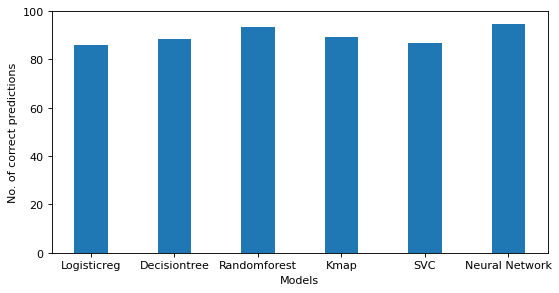

In [ ]:
X=['Logisticreg','Decisiontree','Randomforest','Kmap','SVC','Neural Network']
Y=[ac1,ac2,ac3,ac4,ac5,ac6]
Y1=[i*len(test_y) for i in Y]

fig=plt.figure(figsize=(8,4),dpi=80)
color=['b' for i in range(5)].append('r')
plt.bar(X,Y,width=0.4,color=color)
plt.ylabel("No. of correct predictions")
plt.ylim(0,100)
plt.xlabel("Models")
plt.show()

# CHECKING MY DATA

In [ ]:
arr=np.array([mydata])
model1.predict(arr)

array([1], dtype=int64)

In [ ]:
arr=np.array([mydata])
model2.predict(arr)

array([1], dtype=int64)

In [ ]:
arr=np.array([mydata])
model3.predict(arr)

array([1], dtype=int64)

In [ ]:
arr=np.array([mydata])
model.predict(arr)

array([[0.94498444]], dtype=float32)